# Prepare Data

In [1]:
#Import everything
import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import os
#import MAGAN

/yunity/arusty/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2024-05-15 10:04:06.587097: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 10:04:06.591300: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 10:04:06.645358: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 10:04:08.356

In [2]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected
#tma.clear_directory()

#Converts old way of storing files to the new - if any
tma.change_old_files_to_new()

<><><><><><><><><><><><><><><><><><><><><><><>     Updates completed     <><><><><><><><><><><><><><><><><><><><><><><>


True

In [6]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms(csv_file="iris.csv", split = "distort", percent_of_anchors = [0.05], random_state=6739, verbose = 2)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
#test.run_SPUD_tests(kind = ["distance"])
#test.run_DIG_tests(predict = True)
test.run_NAMA_tests()
#test.run_DTA_tests()
#test.run_SSMA_tests()
#MAGAN.run_MAGAN(test.split_A, test.split_B, labels1 = test.labels)



 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

Creating a mirror dataset and distorting the features in the second Domain
Split A features shape: (150, 4)
Split B Features shape (150, 4)
MDS initialized with 4 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)

-------------------------------------   NAMA TESTS  /iris  -------------------------------------

Percent of Anchors 0.05


/yunity/arusty/.local/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


    FOSCTTM: 0.14542222222222223
    Cross Embedding: 0.8933333333333333


True

In [113]:
"""Testing All functions"""
class_instances = tma.run_all_tests(csv_files = ["iris.csv"], test_random = 1, #General function arguments
                                split = "random", verbose = 0, percent_of_anchors = [0.05, 0.1, 0.15, 0.2, 0.3], #Init Key arguments
                                run_DIG = False, page_ranks = ("None", "off-diagonal", "full"), predict = True, #DIG key arguments
                                run_DTA = False,
                                run_NAMA = False,
                                run_SSMA = False,
                                run_SPUD = True, operations = ("average", "abs"), kind = ["distance", "pure", "similarity"]) #SPUD key arguments | SPUDS_Algorithm


-------------------------------------    SPUD Tests iris   -------------------------------------

Operation average
    Kind distance
        <><><><><>    File /Users/user/Desktop/Work/ManifoldData/iris/SPUD(r1825)_Ope(average)_Kin(distance)_AP(0.05-0.1-0.15-0.2-0.3)_38.npy already exists   <><><><><>
    Kind pure
        KNN 2
            Percent of Anchors 0.05
                FOSCTTM Score: 0.47653333333333325
                CE Score: 0.38666666666666666
            Percent of Anchors 0.1
                FOSCTTM Score: 0.3628888888888889
                CE Score: 0.7133333333333334
            Percent of Anchors 0.15
                FOSCTTM Score: 0.3322666666666667
                CE Score: 0.6666666666666666
            Percent of Anchors 0.2
                FOSCTTM Score: 0.30333333333333334
                CE Score: 0.6666666666666666
            Percent of Anchors 0.3
                FOSCTTM Score: 0.24191111111111108
                CE Score: 0.8666666666666667
        KNN

In [2]:
#Veiwing with DataFrame
df = tma.upload_to_DataFrame()

#Add a combined metric to help see (The closer to 1 the better)
df["Combined_Metric"] = df["Cross_Embedding_KNN"] - df["FOSCTTM"]

#Save the Data Frame
df.to_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", index=False, na_rep='NaN')

2024-05-14 14:25:16.101582: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 14:25:16.105842: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 14:25:16.158310: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 14:25:17.635081: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-14 14:25:21.053476: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 14:25:21.058129: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will n

In [2]:
#If there is no new data, we could just read in the old csvfile
df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)

df.columns, len(df)

(Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_KNN',
        'Percent_of_Anchors', 'Page_Rank', 'Predicted_Feature_MAE', 'Operation',
        'SPUDS_Algorithm', 'FOSCTTM', 'Cross_Embedding_KNN', 'Combined_Metric'],
       dtype='object'),
 211170)

In [3]:
df.sample(10)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,Combined_Metric
16850,chess,DIG,6991,random,2.0,0.01,0.05,None,NaN,NaN,NaN,0.432487,0.524718,0.092231
103017,zoo,SPUD,6663,random,26.0,0.17,0.10,NaN,NaN,abs,similarity,0.427801,0.009901,-0.417900
154638,Cancer_Data,DIG,4280,random,74.0,0.13,0.10,None,0.088261,NaN,NaN,0.190959,0.905097,0.714138
27642,balance_scale,DIG,8177,skewed,41.0,0.07,0.15,off-diagonal,0.301204,NaN,NaN,0.467983,0.568000,0.100017
16799,breast_cancer,DIG,9159,skewed,128.0,0.19,0.30,full,0.193710,NaN,NaN,0.190229,0.961373,0.771145
3201,heart_disease,SPUD,8960,random,20.0,0.07,0.10,NaN,NaN,average,pure,0.435420,0.491582,0.056162
184108,glass,DIG,6974,random,22.0,0.09,0.05,off-diagonal,0.115170,NaN,NaN,0.466635,0.331776,-0.134859
108702,hepatitis,DTA,203,skewed,5.0,0.03,0.10,NaN,NaN,NaN,NaN,0.328538,0.602649,0.274111
10428,breast_cancer,SPUD,9159,skewed,16.0,0.03,0.20,NaN,NaN,average,distance,0.316995,0.958512,0.641517
156321,Cancer_Data,SPUD,9576,random,110.0,0.19,0.30,NaN,NaN,average,pure,0.333876,0.876977,0.543101


# Visualization Tests

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def subset_df(**kwargs):
    """Each way we want to be subset should be as so 'csv_file' = "glass". It can take any column and any key
    
    Returns subseted Dataframe"""
    subset = df

    for key in kwargs:
        subset = subset[subset[key] == kwargs[key]]
    
    return subset

        
def plot_in_fig(columns, rows, **kwargs):
    """df should be the dataframe
    
    Columns should be a list of dictionaries that represent the key word arguments for plotting.
    rows should be a list of dictionaries that represent the how you want to subset the DF by
    """


    fig, axes = plt.subplots(len(rows), len(columns), figsize = (len(columns)*6, len(rows)*6))

    #Plot everything in the graphs
    row_count = 0 

    for dictionary in rows:
        df = subset_df(**dictionary)
        column_count = 0
        for column in columns:
            df.plot(ax = axes[row_count, column_count], **column, **kwargs)

            #Add one to the next axis
            column_count += 1

        #Set the label
        axes[row_count, 0].set_ylabel(f"{dictionary}")

        #Add one to the next row
        row_count += 1

        
    #This gets rid of the annoying text
    plt.show()



## Comparing Methods with Box Plots

Observations: While DTA, DIG, SPUD, and NAMA all have similar distributions, both DIG and SPUD have instances that are signifacantly better than the other metrics. DIG preforms the best overall. 

*Note made May 10th (2k+ files taken into  account)

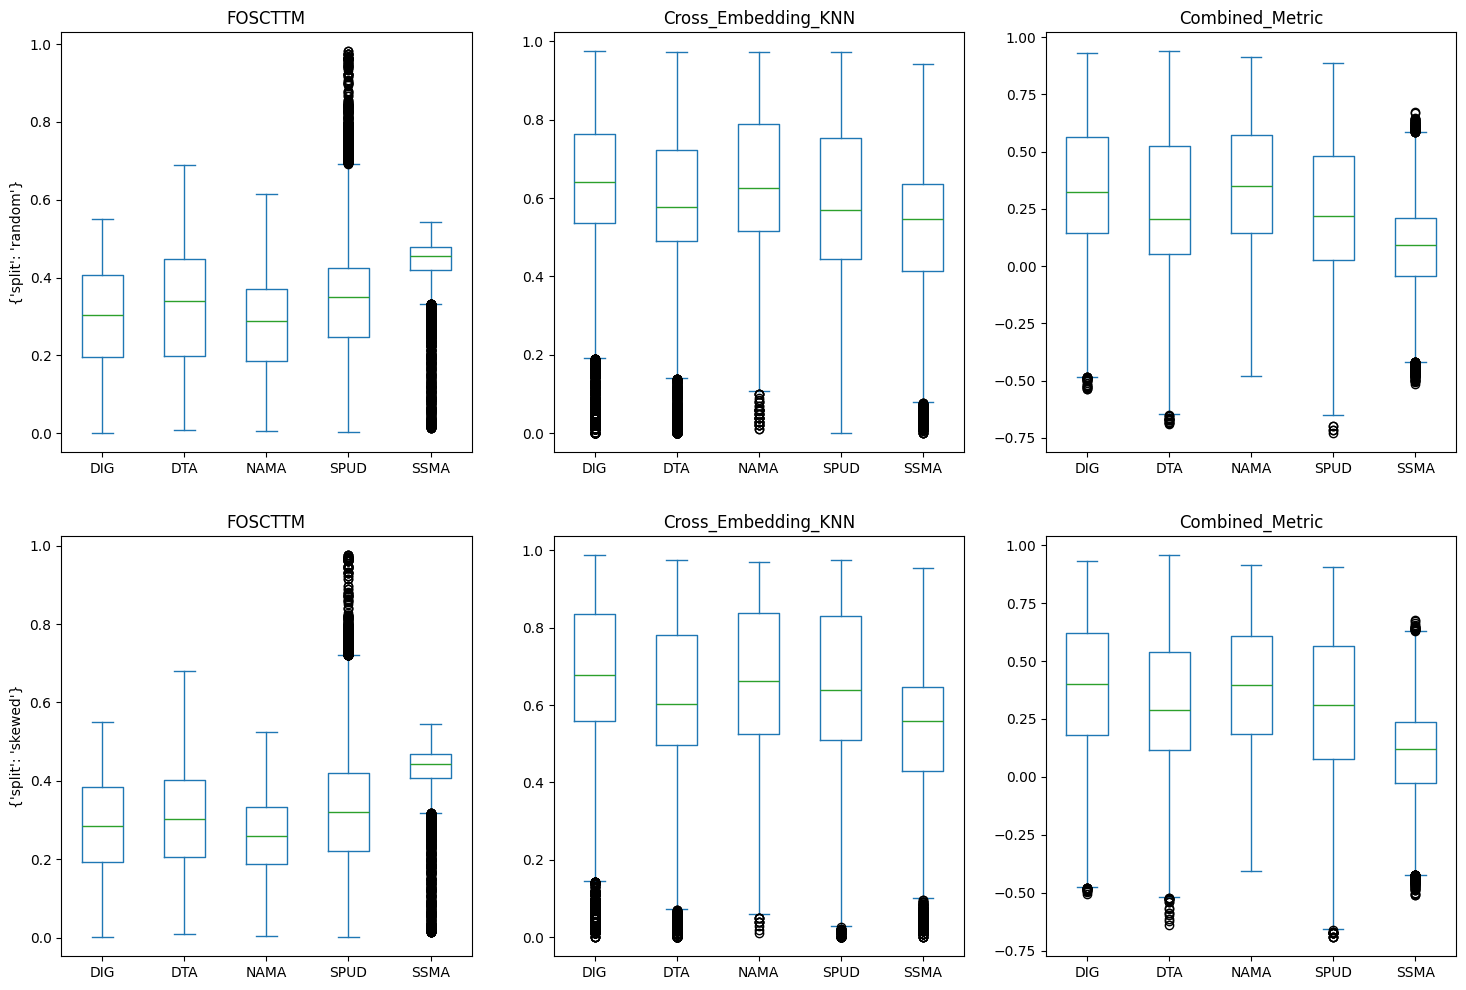

In [5]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, by='method', kind = 'box')

## Comparing Arguments within the same Methods

### DIG

We See that Page Rank has little effect on the overall graph data

In [6]:
#If we want to see only a few csv files at a time, we can sub set it here
#df_subset2 = df[df["csv_file"] == "glass"]

#To see all of it combined
df_subset2 = df

#Change the method to DIG
df_subset2 = df_subset2[df_subset2["method"] == "DIG"]

In [7]:
df_subset2.sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,Combined_Metric
198456,parkinsons,DIG,1825,random,38.0,0.19,0.15,None,0.100293,NaN,NaN,0.237186,0.738462,0.501275
21802,ionosphere,DIG,1512,random,66.0,0.17,0.15,None,0.184714,NaN,NaN,0.338747,0.504274,0.165526
96100,water_potability,DIG,1825,random,596.0,0.19,0.30,off-diagonal,NaN,NaN,NaN,NaN,NaN,NaN
124115,crx,DIG,3347,random,16.0,0.03,0.30,None,0.269977,NaN,NaN,0.203644,0.742470,0.538825
25129,ionosphere,DIG,9662,skewed,50.0,0.13,0.30,None,0.174246,NaN,NaN,0.125689,0.766382,0.640693


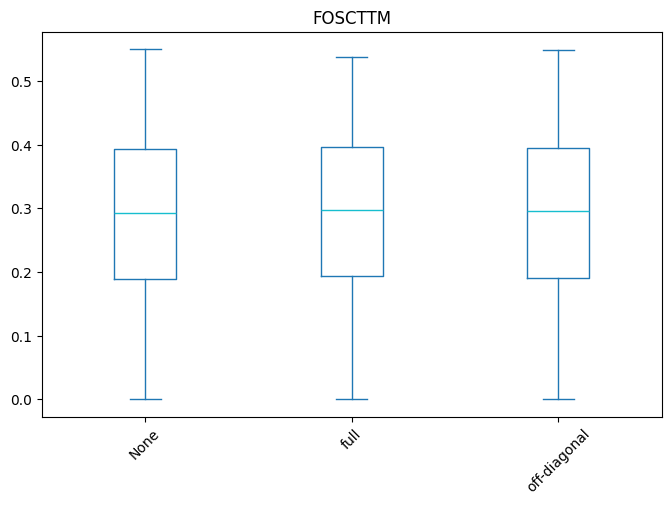

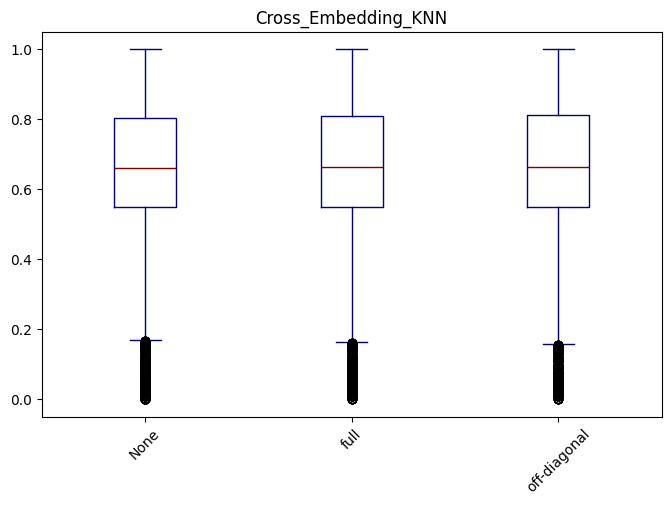

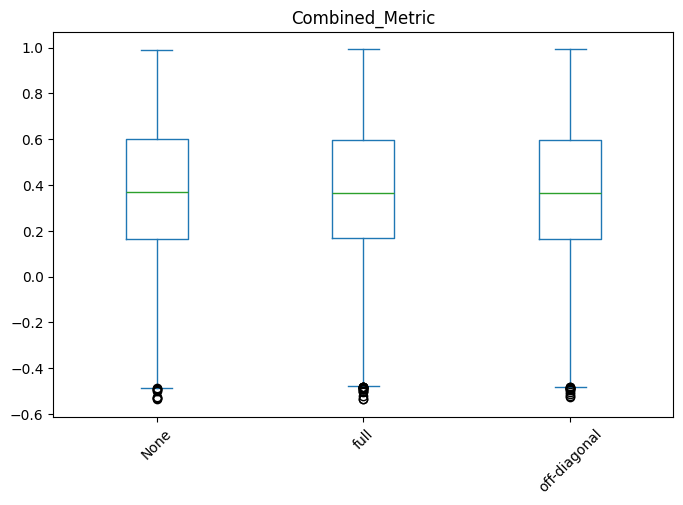

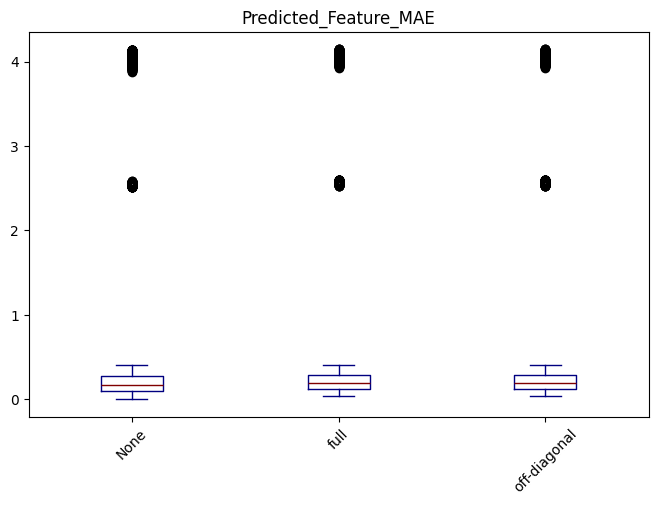

In [8]:
#To make it easier to add edits
key_words = {"figsize": (8, 5),
            "kind": "box",
            "by": "Page_Rank",
            "rot": 45}

df_subset2.plot(column='FOSCTTM', cmap='tab10', **key_words)
df_subset2.plot(column='Cross_Embedding_KNN', cmap = "jet", **key_words)
df_subset2.plot(column='Combined_Metric', **key_words)
df_subset2.plot(column='Predicted_Feature_MAE', cmap = "jet", **key_words)

plt.show()

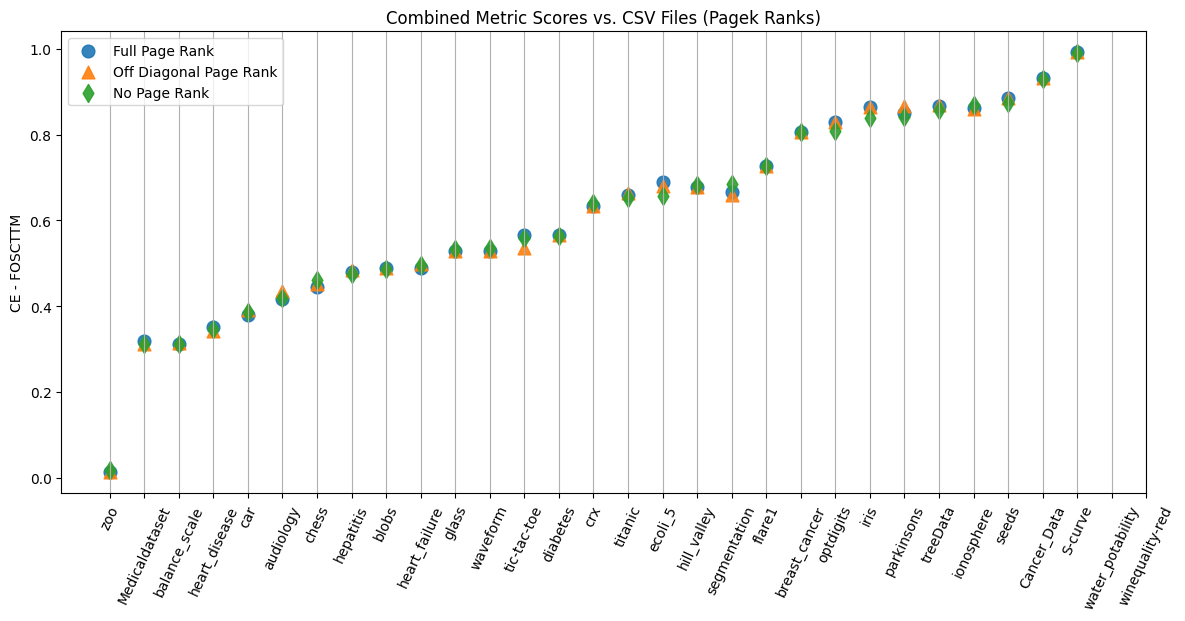

In [9]:
#Create an aggregate DF 
agregate_df = pd.DataFrame({
    'Full_Page_Rank': df[df["Page_Rank"] == "off-diagonal"].groupby("csv_file")["Combined_Metric"].max(),
    'Off-Diagonal_Page_Rank': df[df["Page_Rank"] == "full"].groupby("csv_file")["Combined_Metric"].max(),
    'No_Page_Rank': df[df["Page_Rank"] == "None"].groupby("csv_file")["Combined_Metric"].max()
})


agregate_df = agregate_df.sort_values(by = "No_Page_Rank").reset_index()

#To make it easier to add edits
key_words = {"x" : agregate_df.index,
            "s" : 84,
            "alpha" : .90}

plt.figure(figsize=(14, 6))
ax = plt.scatter(y = agregate_df["Full_Page_Rank"], label = "Full Page Rank", **key_words) #I'm back and forth on the helpfulness of the markers
ax = plt.scatter(y = agregate_df["Off-Diagonal_Page_Rank"], marker = '^', label = "Off Diagonal Page Rank", **key_words)
ax = plt.scatter(y = agregate_df["No_Page_Rank"], marker = 'd', label = "No Page Rank", **key_words)


#Show Legend
plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 65)
plt.title(f"Combined Metric Scores vs. CSV Files (Pagek Ranks)")
plt.ylabel("CE - FOSCTTM")
plt.grid(visible=True, axis = "x")
plt.legend()
plt.show()

### SPUD

Notes:
1. Distance seems to be the best metric (This note was made when we only have iris data tested)

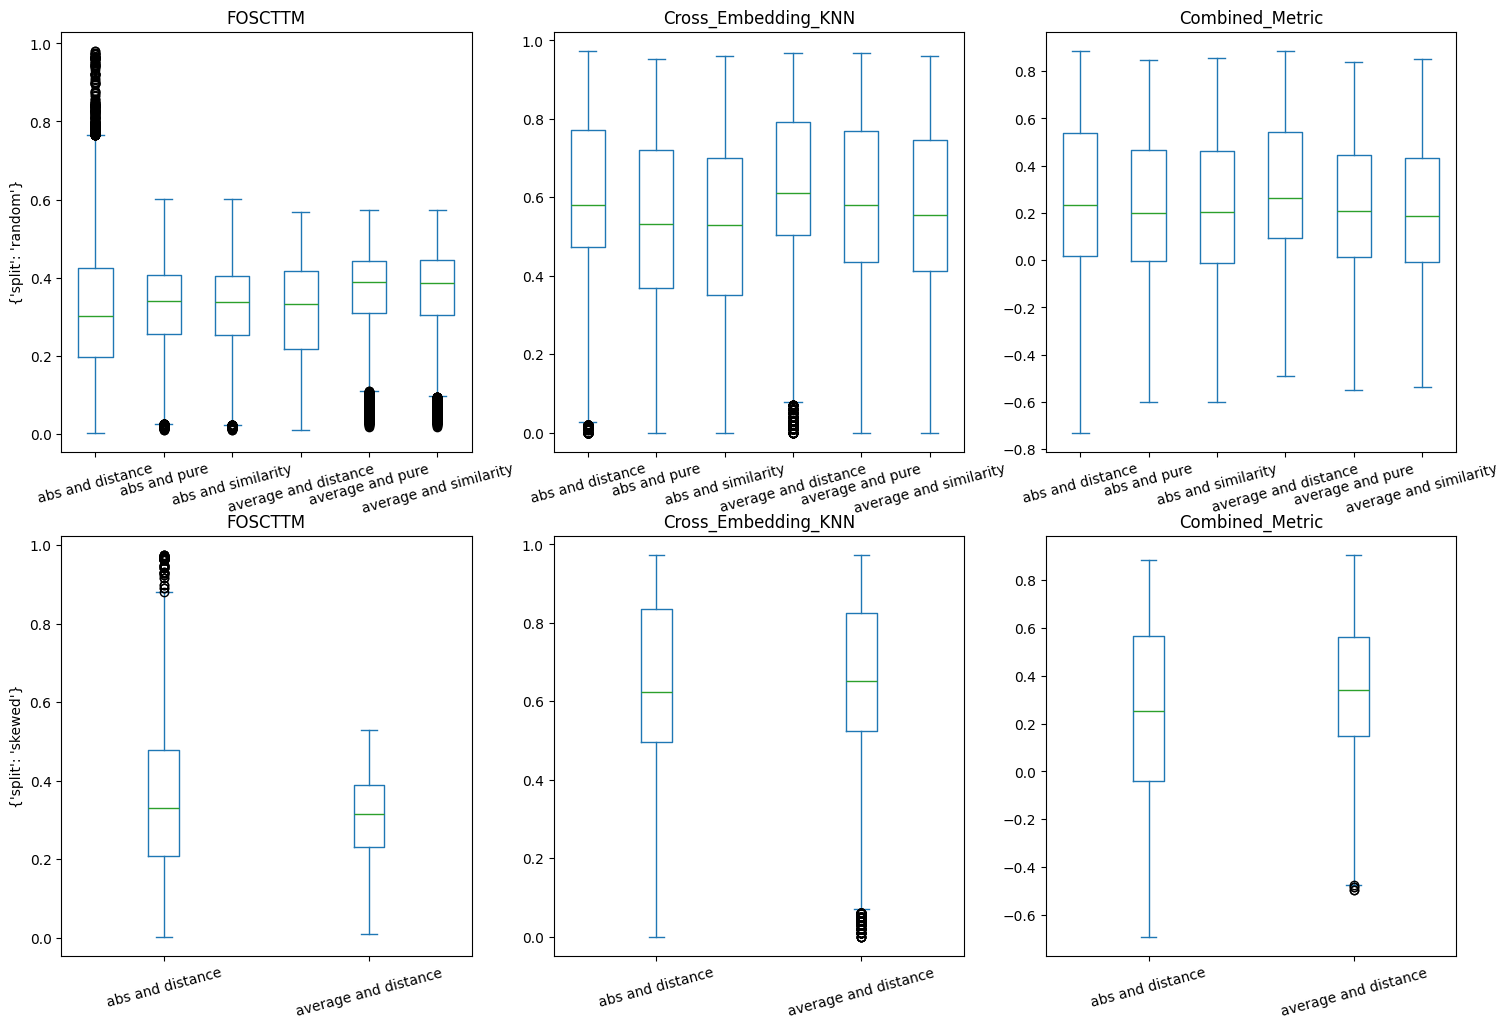

In [10]:
#To make it easier to add edits
key_words = {"figsize": (10, 6),
            "kind": "box",
            "by": "Combined_Arguments",
            "rot": 15}

#Combine DIG argumenst
df["Combined_Arguments"] = df["Operation"]+ " and " + df["SPUDS_Algorithm"]

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed"#, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, **key_words)

## Comparing Methods against CSV Files

In [119]:
def plt_methods_by_CSV_max(sort_by = "SPUD", return_df =False):
    """Plots the max of the combined metric for each method to each CSV_File
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")["Combined_Metric"].max(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")["Combined_Metric"].max(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")["Combined_Metric"].max(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")["Combined_Metric"].max(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")["Combined_Metric"].max()
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index,
                "s" : 84,
                "alpha" : .90}

    plt.figure(figsize=(16, 6))
    ax = plt.scatter(y = agregate_df["SPUD"], label = "SPUD", **key_words) 
    ax = plt.scatter(y = agregate_df["DIG"], marker = '^', label = "DIG", **key_words)
    ax = plt.scatter(y = agregate_df["SSMA"], marker = 's', label = "SSMA", **key_words)
    ax = plt.scatter(y = agregate_df["DTA"], marker = "d", label = "DTA", **key_words)
    ax = plt.scatter(y = agregate_df["NAMA"], marker = '*', label = "NAMA", **key_words)

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"Combined Metric Scores vs. CSV Files (MAX)")
    plt.ylabel("CE - FOSCTTM")
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

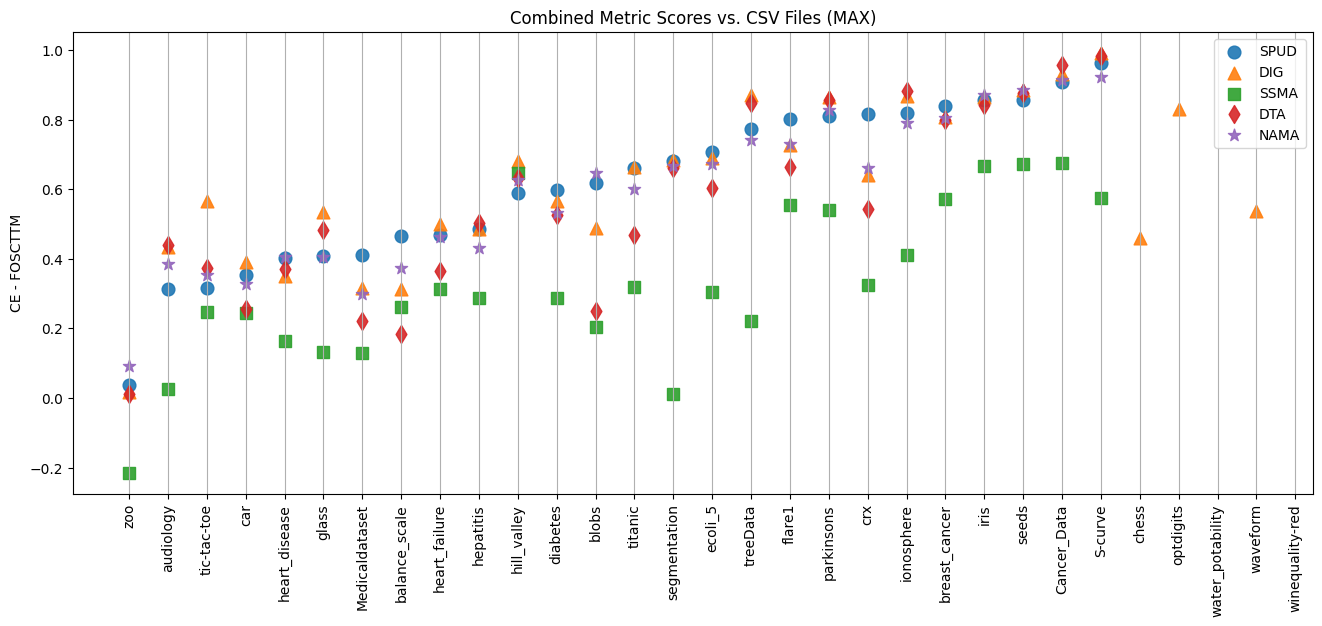

In [120]:
plt_methods_by_CSV_max()

In [121]:
def plt_methods_by_CSV_mean(sort_by = "SPUD", return_df = False):
    """Plots 95 percent confident intervals for each method against csv files
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")["Combined_Metric"].mean(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")["Combined_Metric"].mean(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")["Combined_Metric"].mean(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")["Combined_Metric"].mean(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")["Combined_Metric"].mean()
    })

    #Calculate error bars
    err_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")["Combined_Metric"].std() *2,
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")["Combined_Metric"].std() *2 ,
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")["Combined_Metric"].std()*2,
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")["Combined_Metric"].std()*2,
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")["Combined_Metric"].std()*2
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"ms" : 8,
                "alpha" : .75}

    plt.figure(figsize=(20, 6))
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["SPUD"], yerr = err_df["SPUD"], fmt = "o", label = "SPUD", **key_words) 
    ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["DIG"], yerr = err_df["DIG"],fmt = '^', label = "DIG", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.1, y = agregate_df["SSMA"], yerr = err_df["SSMA"],fmt = 's', label = "SSMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index - 0.1, y = agregate_df["DTA"], yerr = err_df["DTA"], fmt = "d", label = "DTA", **key_words)
    ax = plt.errorbar(x = agregate_df.index - 0.2, y = agregate_df["NAMA"], yerr = err_df["NAMA"],fmt = '*', label = "NAMA", **key_words)

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"Combined Metric Scores vs. CSV Files (MEAN)")
    plt.ylabel("CE - FOSCTTM")
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

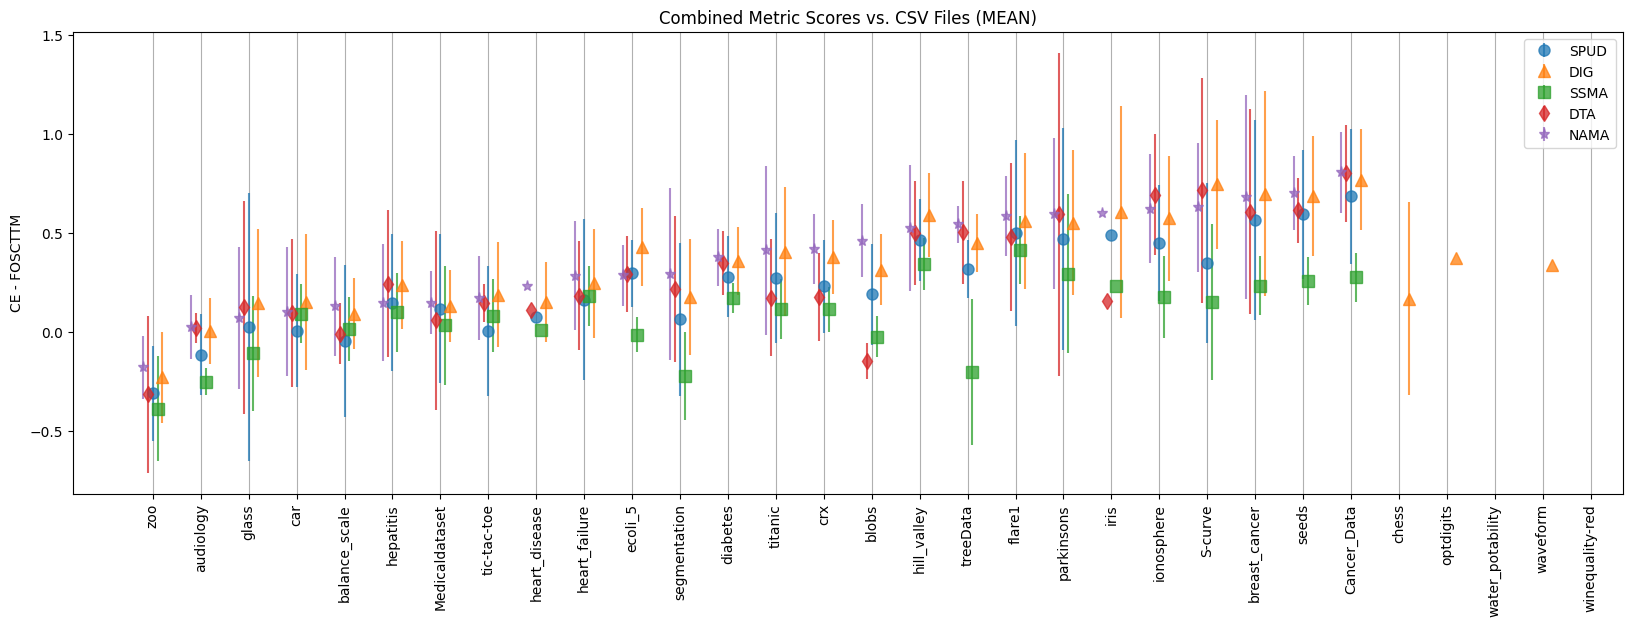

In [122]:
plt_methods_by_CSV_mean(sort_by="NAMA")

### Rankings

In [123]:
#Get the rankings for each Method by CSV file. Higher is better
csv_df = plt_methods_by_CSV_max(return_df=True)
df_ranked = csv_df.drop(columns= ["csv_file"]).rank(ascending=True, method='max', axis = 1)
df_ranked

,SSMA,DTA,SPUD,DIG,NAMA
0,1.0,2.0,4.0,3.0,5.0
1,1.0,5.0,2.0,4.0,3.0
2,1.0,4.0,2.0,5.0,3.0
3,1.0,2.0,4.0,5.0,3.0
4,1.0,3.0,4.0,2.0,5.0
5,1.0,4.0,3.0,5.0,2.0
6,1.0,2.0,5.0,4.0,3.0
7,2.0,1.0,5.0,3.0,4.0
8,1.0,2.0,4.0,5.0,3.0
9,1.0,5.0,4.0,3.0,2.0


In [124]:
#This shows which method has preformed the Best overall
df_ranked.sum(axis = 0)

SSMA     30.0
DTA      76.0
SPUD     93.0
DIG     110.0
NAMA     84.0
dtype: float64

In [125]:
#This shows which method had the most times where it was best
df_best_method = csv_df.drop(columns= ["csv_file"]).idxmax(axis = 1)
df_best_method.value_counts()

DIG     14
SPUD     7
NAMA     4
DTA      4
Name: count, dtype: int64

## Comparing Percent of anchors and KNN values

In [ ]:
def line_plot_methods(subset = "None", argument = "Percent_of_Anchors"):
    "subset should equal none or the csv file name"

    #Subset the data
    if subset != "None":
        df_subset = df[df["csv_file"] == subset]
    else:
        df_subset = df
    
    #Create figure
    plt.figure(figsize=(14,7))

    #Plot the graphs
    plt.plot(df_subset[df_subset["method"] == "SSMA"].groupby(argument)["Combined_Metric"].mean(), label = "SSMA")
    plt.plot(df_subset[df_subset["method"] == "DTA"].groupby(argument)["Combined_Metric"].mean(), label = "DTA")
    plt.plot(df_subset[df_subset["method"] == "DIG"].groupby(argument)["Combined_Metric"].mean(), label = "DIG")

    #Show different SPUD arguments
    plt.plot(df_subset[df_subset["Operation"] == "average"].groupby(argument)["Combined_Metric"].mean(), label = "SPUD - Avg")
    plt.plot(df_subset[df_subset["Operation"] == "abs"].groupby(argument)["Combined_Metric"].mean(), label = "SPUD - Abs")

    if argument != "Percent_of_KNN":
        plt.plot(df_subset[df_subset["method"] == "NAMA"].groupby(argument)["Combined_Metric"].mean(), label = "NAMA")



    #Make it pretty
    plt.xlabel(argument)
    plt.ylabel("Combined Metric Score (CE - FOSCTTM)")
    plt.legend()
    plt.title("Methods Together")



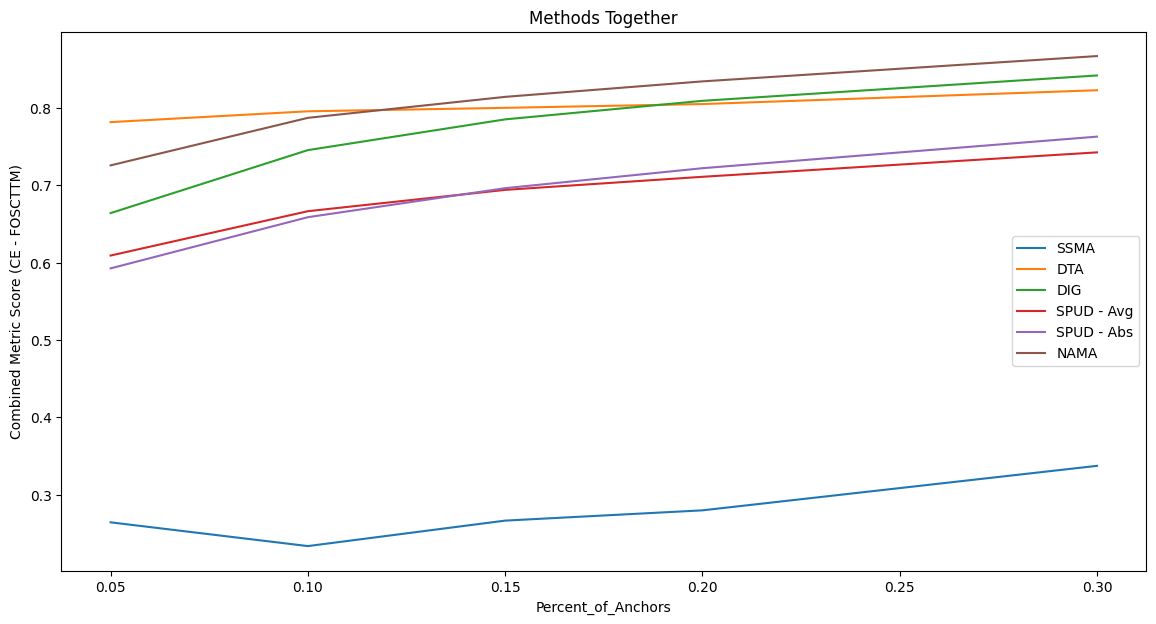

In [ ]:
line_plot_methods(subset = "Cancer_Data")

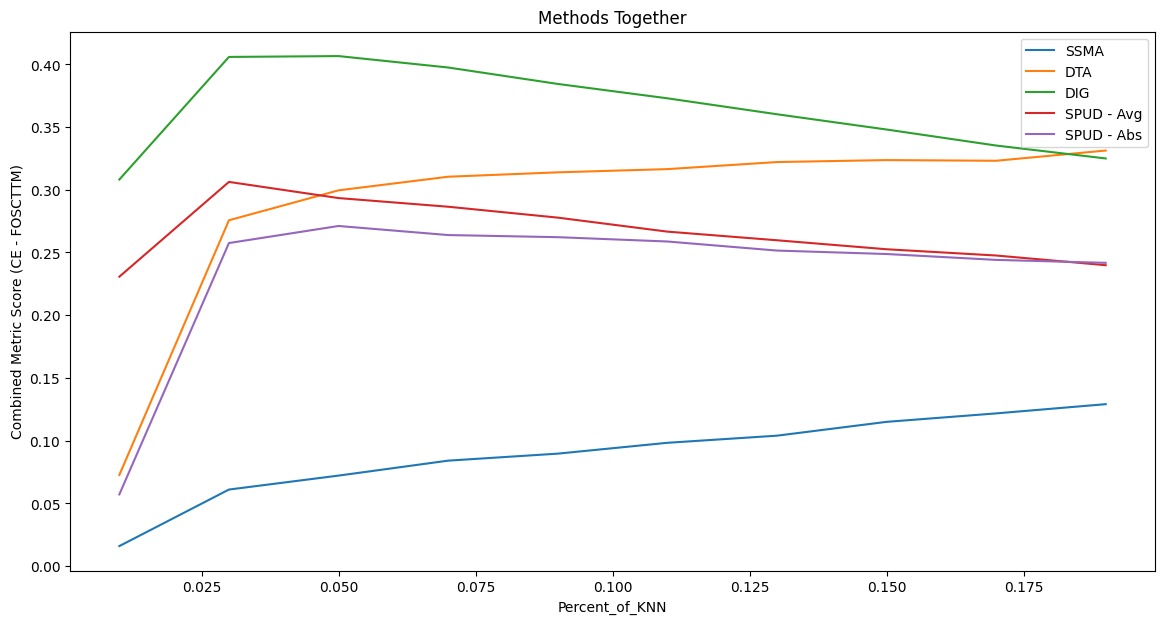

In [ ]:
line_plot_methods(argument = "Percent_of_KNN")

## Plotting the Embeddings

In [ ]:
visual_test = tma.test_manifold_algorithms(csv_file="iris.csv", split= "skewed", percent_of_anchors= [0.1, 0.2], verbose=2)


 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

Splitting the data in a skewed fashion
Split A features shape: (150, 2)
Split B Features shape (150, 2)
MDS initialized with 2 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


Percent of anchors used: 0.2
The amount of Nearest Neighbors: 5


/yunity/arusty/.local/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


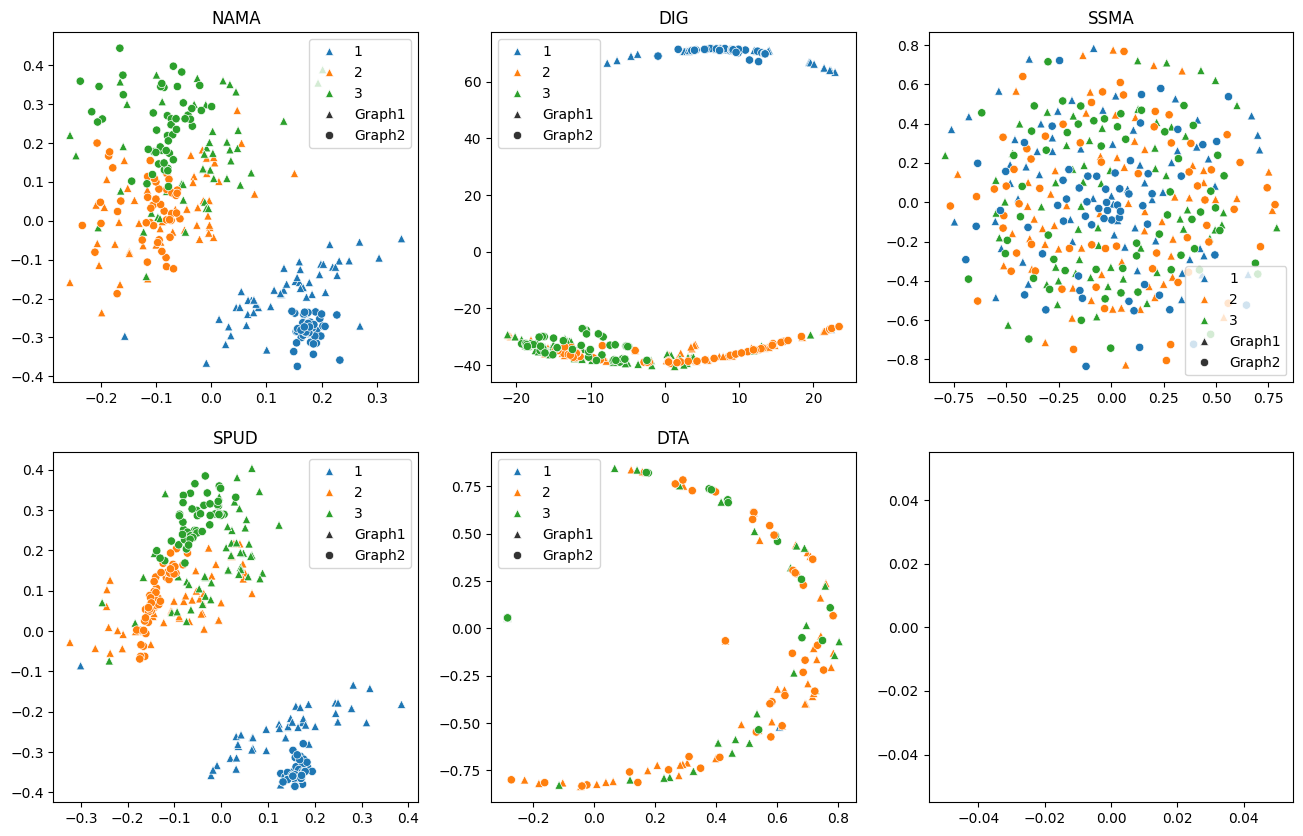

In [ ]:
visual_test.plot_embeddings(knn = 5)

Percent of anchors used: 0.2
The amount of Nearest Neighbors: 48


/yunity/arusty/.local/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
/yunity/arusty/.local/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:747: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


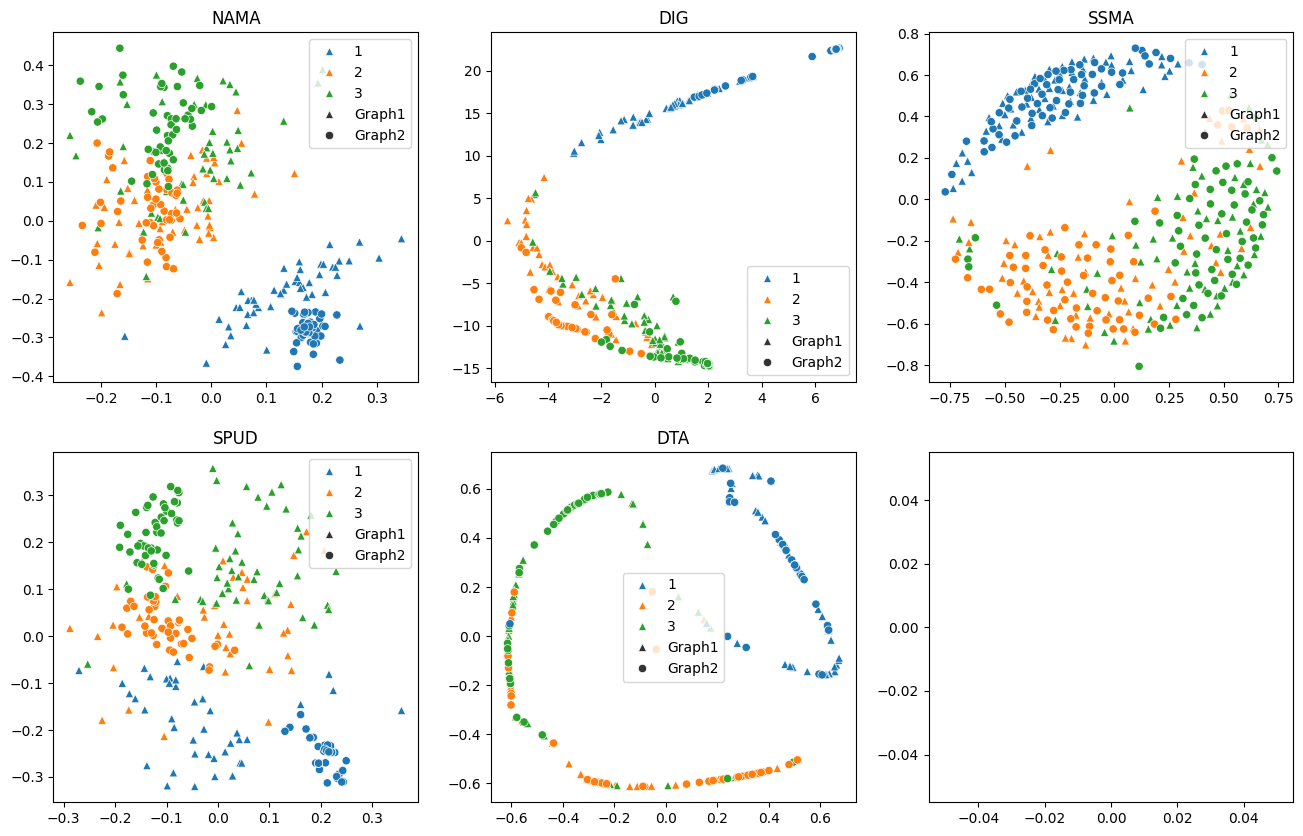

In [ ]:
visual_test.plot_embeddings(knn = 48, operation = "abs")

# Debugging Tests Below